In [1]:
import requests

In [2]:
#網址中的period1是指起始時間，而period2是指結束時間，其單位為1970的過了n秒
# Yahoo Finance => https://finance.yahoo.com
site="https://query1.finance.yahoo.com/v8/finance/chart/2330.TW?period1=0&period2=1608336000&interval=1d&events=history&=hP2rOschxO0"
response = requests.get(site)

In [3]:
print(response.text)
# 此種資料格式是json

{"chart":{"result":[{"meta":{"currency":"TWD","symbol":"2330.TW","exchangeName":"TAI","instrumentType":"EQUITY","firstTradeDate":946947600,"regularMarketTime":1586151001,"gmtoffset":28800,"timezone":"CST","exchangeTimezoneName":"Asia/Taipei","regularMarketPrice":275.5,"chartPreviousClose":69.649,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"CST","end":1586134800,"start":1586134800,"gmtoffset":28800},"regular":{"timezone":"CST","end":1586151000,"start":1586134800,"gmtoffset":28800},"post":{"timezone":"CST","end":1586151000,"start":1586151000,"gmtoffset":28800}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[946947600,947034000,947120400,947206800,947466000,947552400,947638800,947725200,947811600,948070800,948157200,948243600,948330000,948416400,948675600,948762000,948848400,948934800,949021200,949280400,949366800,949453200,949539600,949626000,949885200,949971600,950058000,950144400,950230800,9504900

In [4]:
#文字檔轉成 python 的 dictionary 跟 list 的結構並且將資料轉成dataframe
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=json.loads(response.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))

In [5]:
df.head()

,volume,high,close,open,low
2000-01-04 01:00:00,2.006623e+11,69.649002,69.649002,69.649002,68.475197
2000-01-05 01:00:00,4.024668e+11,71.214104,71.214104,69.649002,68.866302
2000-01-06 01:00:00,1.975457e+11,71.214104,69.649002,70.822899,69.649002
2000-01-07 01:00:00,2.352703e+11,68.475197,67.692497,67.301300,66.518600
2000-01-10 01:00:00,2.761717e+11,70.431396,70.040199,69.649002,68.475197


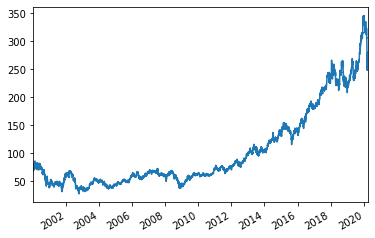

In [6]:
#對收盤價做圖
df.close.plot()

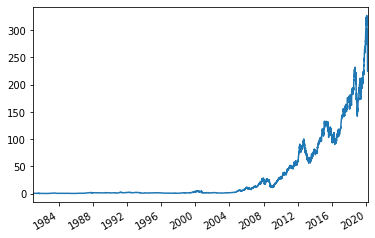

In [7]:
import requests
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#period 1980~2021
site="https://query1.finance.yahoo.com/v8/finance/chart/AAPL?period1=315360000&period2=1608336000&interval=1d&events=history&=hP2rOschxO0"
AAPL = requests.get(site)

data=json.loads(AAPL.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
df.close.plot()
plt.show()

In [8]:
import requests
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#period 1980~2021
def crawl_price(stock_id):
    url="https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=315360000&period2=1608336000&interval=1d&events=history&=hP2rOschxO0"
    res = requests.get(url)

    data=json.loads(res.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df

請輸入股票代碼2330.TW


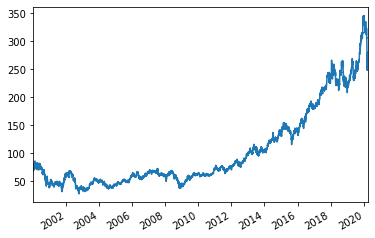

In [20]:
A1=input("請輸入股票代碼")
df = crawl_price(A1)
df.close.plot()

 手動複製網頁清單

In [21]:
url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

import io
f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]

#第5行有點不一樣，我們使用io.StringIO(response.text)將資料存成檔案f
#第6行，我們將此文件利用pd.read_html(f)來分析網頁f中的表格，將所有的表格存成 a list of dataframe
#第7行，我們將第一張dataframe給拿出來

In [22]:
dfs[0]

,Symbol,Name,Last Price,Change,% Change,Volume,Intraday High/Low,52 Week Range,Day Chart
0,^GSPC,S&P 500,2600.32,+111.67,+4.49%,1.028B,NaN,NaN,NaN
1,^DJI,Dow 30,22009.58,+957.05,+4.55%,143.416M,NaN,NaN,NaN
2,^IXIC,Nasdaq,7711.27,+338.19,+4.59%,743.728M,NaN,NaN,NaN
3,^NYA,NYSE COMPOSITE (DJ),10349.96,+469.33,+4.75%,0,NaN,NaN,NaN
4,^XAX,NYSE AMEX COMPOSITE INDEX,1567.04,+46.73,+3.07%,0,NaN,NaN,NaN
5,^BUK100P,Cboe UK 100 Price Return,9423.17,+263.55,+2.88%,0,NaN,NaN,NaN
6,^RUT,Russell 2000,1120.32,+68.26,+6.49%,0,NaN,NaN,NaN
7,^VIX,Vix,45.09,-1.71,-3.65%,0,NaN,NaN,NaN
8,^FTSE,FTSE 100,5554.75,+139.25,+2.57%,0,NaN,NaN,NaN
9,^GDAXI,DAX PERFORMANCE-INDEX,10049.30,+523.53,+5.50%,0,NaN,NaN,NaN


In [23]:
#同時執行兩個迴圈  ZIP
for number,letter in zip([1,2,3],["a","b","c"]):
    print (number,letter)

1 a
2 b
3 c


In [24]:
#dictionary
d = {}
d['a'] = 1
d['b'] = 2

# 查找
print(d['b']) # 2

# 迴圈
# 其中，d.items 有點像是zip的感覺，
# 針對dictionary中的['a', 'b']和[1,2]進行迴圈）
for letter, number in d.items():
    print(letter, number)
# a 1
# b 2

2
a 1
b 2


In [25]:
import requests
%matplotlib inline
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#period 1980~2021
def crawl_price(stock_id):
    url="https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=315360000&period2=1608336000&interval=1d&events=history&=hP2rOschxO0"
    res = requests.get(url)

    data=json.loads(res.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df

url = "https://finance.yahoo.com/world-indices/"
response = requests.get(url)

import io
f = io.StringIO(response.text)
dfs = pd.read_html(f)
world_index = dfs[0]

import time
world_index_history={}
for symbol,name in zip(world_index['Symbol'], world_index['Name']):
    
    print(name)
    
    world_index_history[name] = crawl_price(symbol)
    time.sleep(5)

S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100 Price Return
Russell 2000
Vix
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
EURONEXT 100
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index


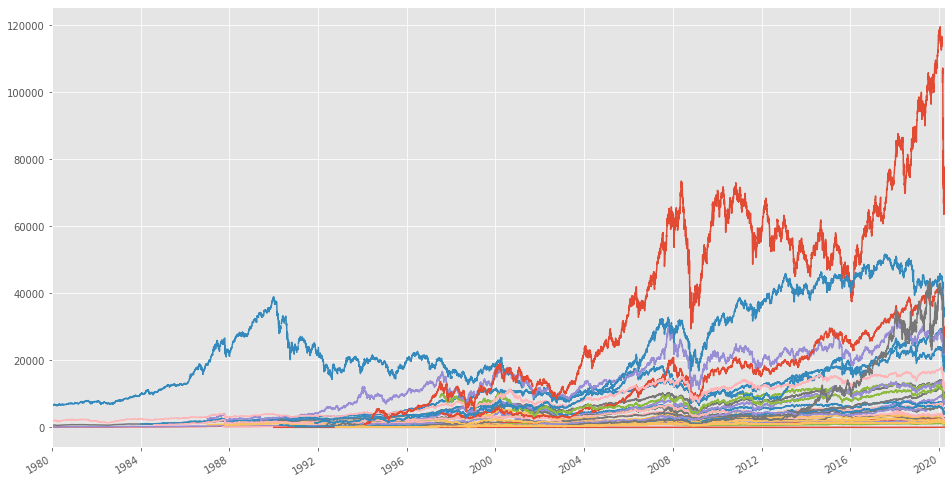

In [30]:
import matplotlib.pyplot as plt
plt.rcParams ['figure.figsize'] =(16,9)
plt.style.use('ggplot')
 
for name, history in world_index_history.items():
    history.close.plot()    